In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().value_counts()

,,,,count
TV,Radio,Newspaper,Sales,
False,False,False,False,200


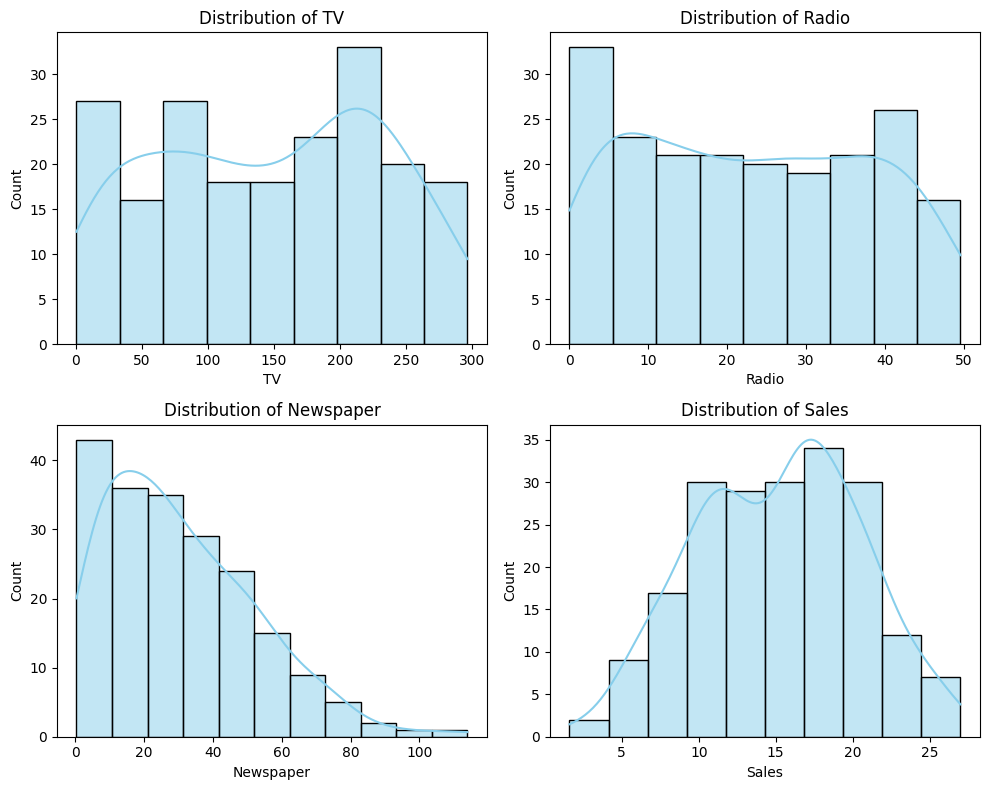

In [8]:
numeric_columns = df.select_dtypes(include='number')

n_cols = 2
n_rows = 2

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

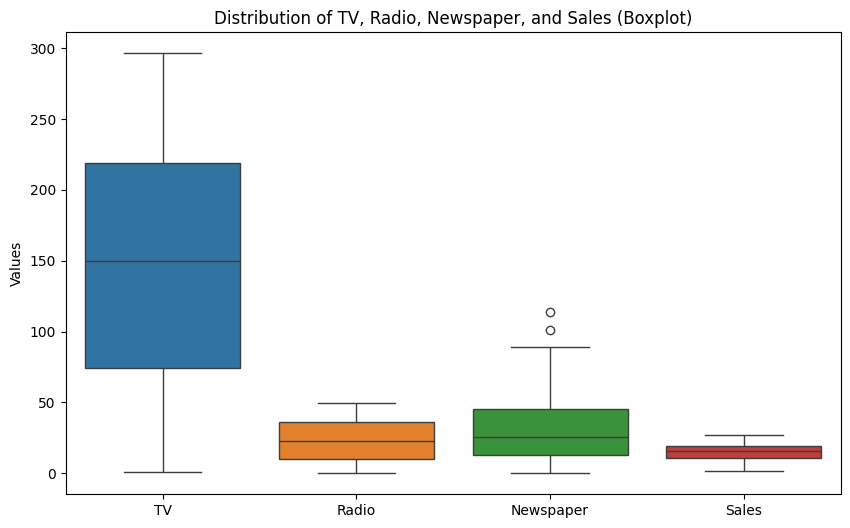

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper', "Sales"]])
plt.title("Distribution of TV, Radio, Newspaper, and Sales (Boxplot)")
plt.ylabel("Values")
plt.show()

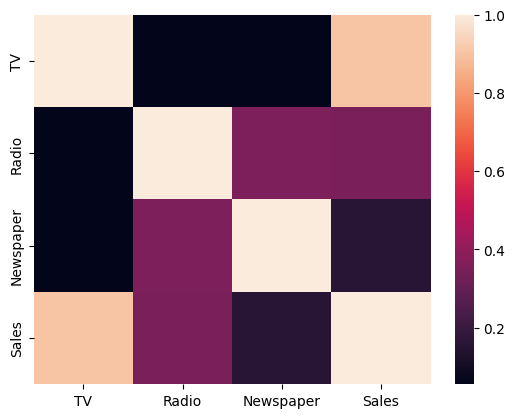

In [10]:
sns.heatmap(data=df.corr())
plt.show()

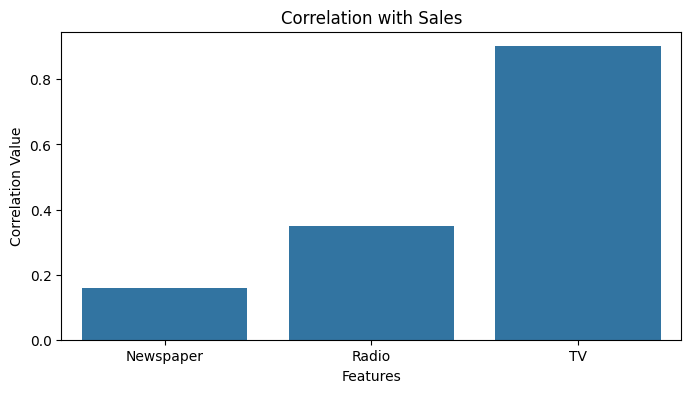

In [11]:
corr = df.corr()['Sales'].drop('Sales').sort_values(ascending=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=corr.index, y=corr.values)
plt.title('Correlation with Sales')
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.show()

In [12]:
X=df[["TV"]]
y=df[["Sales"]]

In [13]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [14]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [16]:
X_train

,TV
6,57.5
95,163.3
101,296.4
151,121.0
190,39.5
...,...
156,93.9
128,220.3
119,19.4
133,219.8


In [17]:
y_train

,Sales
6,11.8
95,16.9
101,23.8
151,11.6
190,10.8
...,...
156,15.3
128,24.7
119,6.6
133,19.6


In [18]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Mean Absolute Error:  1.9829418338152018
Mean Squared Error:  6.136069646459771
R2 Score:  0.8021097886539835


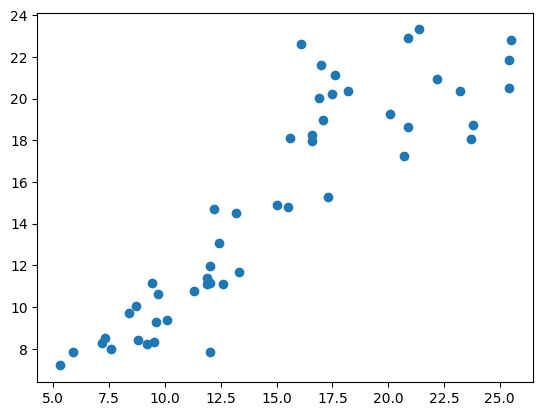

In [19]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [20]:
def poly_regression_detailed_plot(degrees):
    import matplotlib.pyplot as plt
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    import numpy as np

    X_all = np.vstack([X_train, X_test])
    X_line = np.linspace(X_all.min(), X_all.max(), 100).reshape(-1, 1)

    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    fig.suptitle("Polynomial Regression - TV Feature with Prediction Line", fontsize=16)

    for ax, degree in zip(axes.flat, degrees):
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            ("model", LinearRegression())
        ])

        pipeline.fit(X_train, y_train)
        y_line_pred = pipeline.predict(X_line)

        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)

        score = pipeline.score(X_test, y_test)

        ax.plot(X_line, y_line_pred, "r", label="Prediction Line")
        ax.scatter(X_train, y_train, alpha=0.6, label="Train", )
        ax.scatter(X_test, y_test, alpha=0.6, label="Test", )
        ax.set_title(f"Degree {degree}\nR²: {score:.2f}")
        ax.set_xlabel("TV")
        ax.set_ylabel("Sales")
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

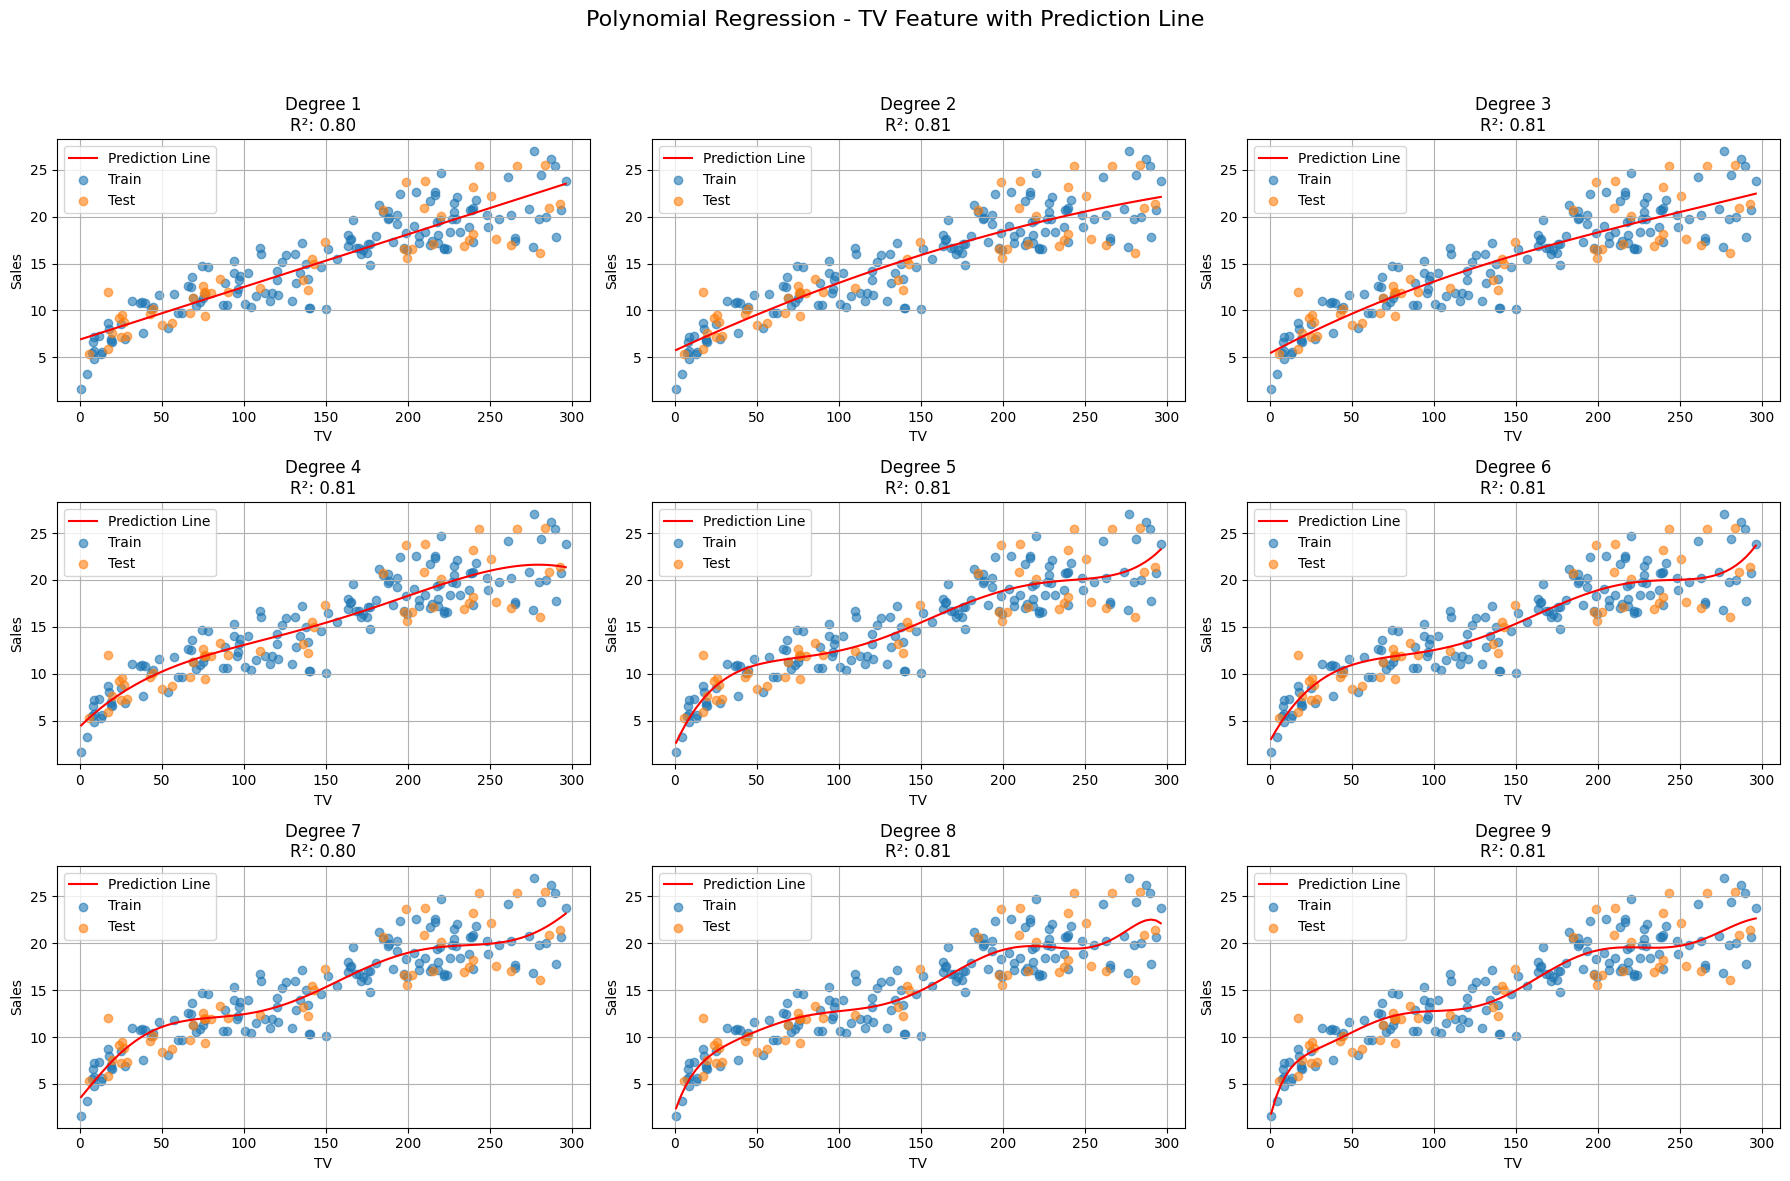

In [21]:
poly_regression_detailed_plot(degrees=range(1, 10))